## Predicting Heart Disease using Machine Learning

This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of heart disease classification.

For example, given a person's health characteristics, we're going to build a model to predict whether or not they have heart disease.

It is intended to be an end-to-end example of what a data science and machine learning proof of concept might look like.

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

# 1 Problem definition
given certain parameters can we predict whether or not a patient has heart disease or not

# 2 Data

The original data came from the Cleveland database from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from Kaggle.

The original database contains 76 attributes, but here only 14 attributes will be used. Attributes (also called features) are the variables what we'll use to predict our target variable.

Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable.

Note: We use the independent variable(s)to predict our dependent variable(s).

In our case, the independent variables are a patient's different medical attributes and the dependent variable is whether or not they have heart disease.

# 3 Evaluation


If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

| Feature   | Description                                                                 | Example Values                       |
|-----------|-----------------------------------------------------------------------------|--------------------------------------|
| age       | Age in years                                                                | 29, 45, 60                           |
| sex       | 1 = male; 0 = female                                                        | 0, 1                                 |
| cp        | Chest pain type:<br>0: Typical angina<br>1: Atypical angina<br>2: Non-anginal pain<br>3: Asymptomatic | 0, 1, 2, 3                           |
| trestbps  | Resting blood pressure (in mm Hg on admission to the hospital)              | 120, 140, 150                        |
| chol      | Serum cholesterol in mg/dl                                                  | 180, 220, 250                        |
| fbs       | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)                       | 0, 1                                 |
| restecg   | Resting electrocardiographic results:<br>0: Nothing to note<br>1: ST-T Wave abnormality<br>2: Left ventricular hypertrophy | 0, 1, 2                     |
| thalach   | Maximum heart rate achieved                                                 | 160, 180, 190                        |
| exang     | Exercise induced angina (1 = yes; 0 = no)                                   | 0, 1                                 |
| oldpeak   | ST depression induced by exercise relative to rest                          | 0.5, 1.0, 2.0                        |
| slope     | Slope of the peak exercise ST segment:<br>0: Upsloping<br>1: Flatsloping<br>2: Downsloping | 0, 1, 2                     |
| ca        | Number of major vessels (0–3) colored by fluoroscopy                        | 0, 1, 2, 3                           |
| thal      | Thalium stress result:<br>1: Normal<br>3: Normal<br>6: Fixed defect<br>7: Reversible defect | 1, 3, 6, 7                  |
| target    | Heart disease diagnosis (1 = disease; 0 = no disease)                       | 0, 1                                 |


In [6]:
## getting the tools ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#models scikitlearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
##evaluation metrices
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import RocCurveDisplay


## Loading the data

In [7]:
df=pd.read_csv("heart-disease (1).csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 4. Data Exploration (exploratory data analysis or EDA)

Since EDA has no real set methodolgy, the following is a short check list you might want to walk through:

1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data

In [9]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

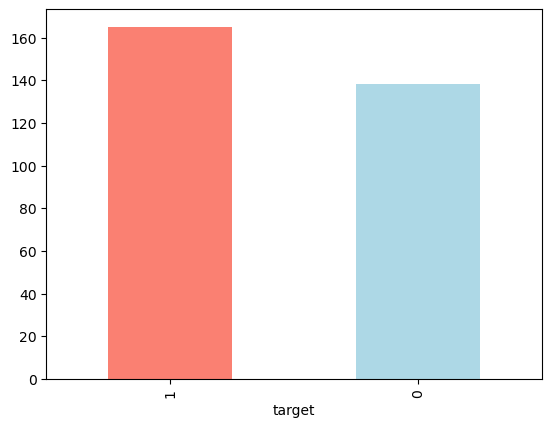

In [11]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [17]:
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


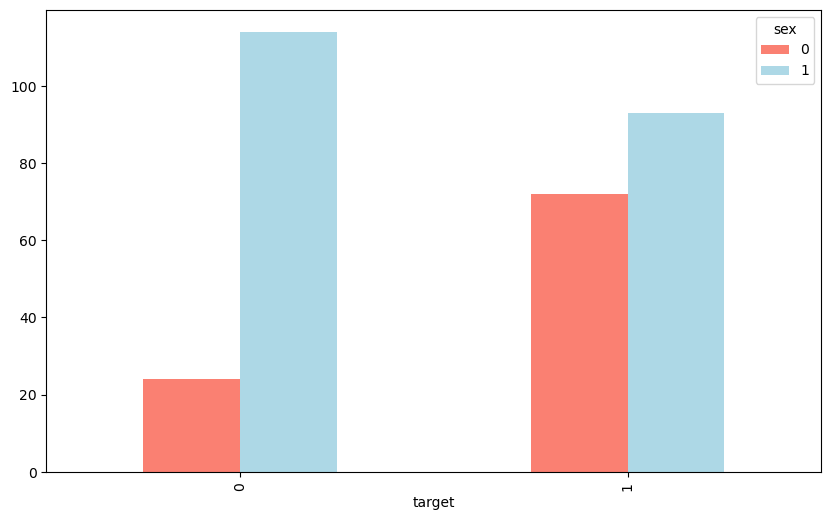

In [18]:
pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);

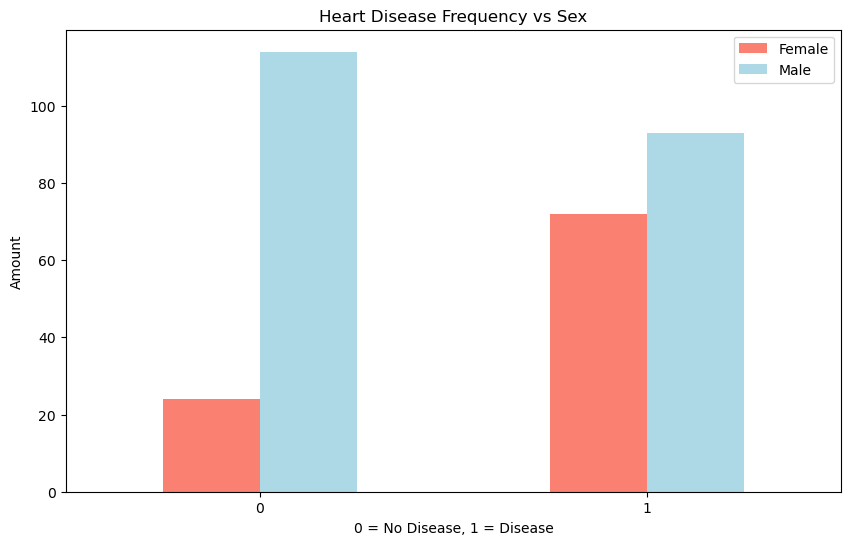

In [19]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Add some attributes to it
plt.title("Heart Disease Frequency vs Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); 